## Setup

In [31]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
sns.set(style="whitegrid")# SNS set up
final = pd.read_csv("final.csv") # Import the dataset
final.drop('Unnamed: 0', inplace=True, axis =1)
# Need to deal with the columns being different types
print(list(final))

['date_open', 'number_of_patients', 'join_parent_date', 'left_parent_date', 'items', 'nic', 'act.cost', 'quantity', 'bnf.chapter', 'bnf.section', 'bnf.paragraph', 'ccg_code1', 'high_level_health_geography1', 'commissioner1', 'sha1', 'bnf.name1', 'ABINGDON  OXFORDSHIRE', 'ALENCON LINK  BASINGSTOKE', 'BARLBOROUGH  CHESTERFIELD', 'BEDFORDSHIRE', 'BERKSHIRE', 'BEVERLEY', 'BIRMINGHAM', 'BRADFORD', 'BRISTOL', 'BROOKLANDS  MILTON KEYNES', 'BROWNHILLS', 'BUCKINGHAMSHIRE', 'CAMBRIDGESHIRE', 'CHESHIRE', 'CHESTER  CHESHIRE', 'CLEVELAND', 'CO.DURHAM', 'COLCHESTER ESSEX', 'CORNWALL', 'COUNTY DURHAM', 'COVENTRY', 'CUMBRIA', 'DERBY', 'DERBYSHIRE', 'DEVIZES  WILTSHIRE', 'DEVON', 'DONCASTER', 'DORSET', 'DOVER  KENT', 'EAST SUSSEX', 'EAST YORKSHIRE', 'ENFIELD  MIDDLESEX', 'ESSEX', 'GLOUCESTER', 'GLOUCESTERSHIRE', 'GREAT BARR BIRMINGHAM', 'HAMPSHIRE', 'HARTLEPOOL CLEVELAND', 'HEREFORDSHIRE', 'HERTFORDSHIRE', 'HUDDERSFIELD', 'HUNTINGDON CAMBRIDGESHIRE', 'ILFORD  ESSEX', 'ISLE OF WIGHT', 'KENT', 'KINGSTON 

# Initial boxplots

# Correlation matrix

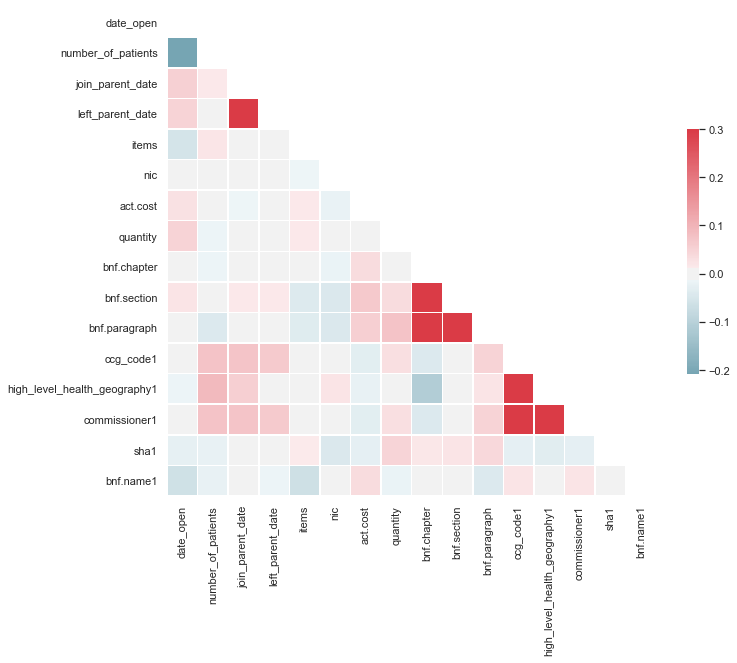

In [36]:
# Small dataset for correlation matrix
small = final.iloc[:, : 16] # Select all the columns that are not from one hot encoding

# Compute the correlation matrix
corr = small.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

,date_open,number_of_patients,join_parent_date,left_parent_date,items,nic,act.cost,quantity,bnf.chapter,bnf.section,bnf.paragraph,ccg_code1,high_level_health_geography1,commissioner1,sha1,bnf.name1
date_open,1.000000,-0.207391,0.055338,0.048407,-0.053637,0.005320,0.028366,0.048605,0.003859,0.022958,0.005533,-0.002514,-0.013554,-0.002514,-0.024030,-0.061204
number_of_patients,-0.207391,1.000000,0.014939,0.006504,0.019031,0.001449,0.007519,-0.014196,-0.014123,-0.007780,-0.040895,0.075808,0.091320,0.075808,-0.022321,-0.021582
join_parent_date,0.055338,0.014939,1.000000,0.866922,-0.003406,-0.004723,-0.011237,0.003059,-0.004324,0.015270,0.010306,0.073161,0.057863,0.073161,0.005767,-0.007055
left_parent_date,0.048407,0.006504,0.866922,1.000000,-0.004686,-0.003259,-0.001893,0.001070,0.000350,0.014938,0.009643,0.064242,0.005960,0.064242,0.010899,-0.015680
items,-0.053637,0.019031,-0.003406,-0.004686,1.000000,-0.011224,0.015207,0.015804,-0.005151,-0.037211,-0.035672,0.005850,-0.008318,0.005850,0.012957,-0.063316
nic,0.005320,0.001449,-0.004723,-0.003259,-0.011224,1.000000,-0.020770,-0.010481,-0.017889,-0.043232,-0.043392,0.000809,0.023328,0.000809,-0.041688,-0.003483
act.cost,0.028366,0.007519,-0.011237,-0.001893,0.015207,-0.020770,1.000000,0.010279,0.036229,0.068015,0.056841,-0.031516,-0.022470,-0.031516,-0.025541,0.037955
quantity,0.048605,-0.014196,0.003059,0.001070,0.015804,-0.010481,0.010279,1.000000,-0.005793,0.037725,0.076308,0.032333,-0.006109,0.032333,0.046574,-0.017416
bnf.chapter,0.003859,-0.014123,-0.004324,0.000350,-0.005151,-0.017889,0.036229,-0.005793,1.000000,0.523441,0.408974,-0.040180,-0.110174,-0.040180,0.017428,0.010817
bnf.section,0.022958,-0.007780,0.015270,0.014938,-0.037211,-0.043232,0.068015,0.037725,0.523441,1.000000,0.570697,-0.007245,-0.005806,-0.007245,0.023987,-0.008116


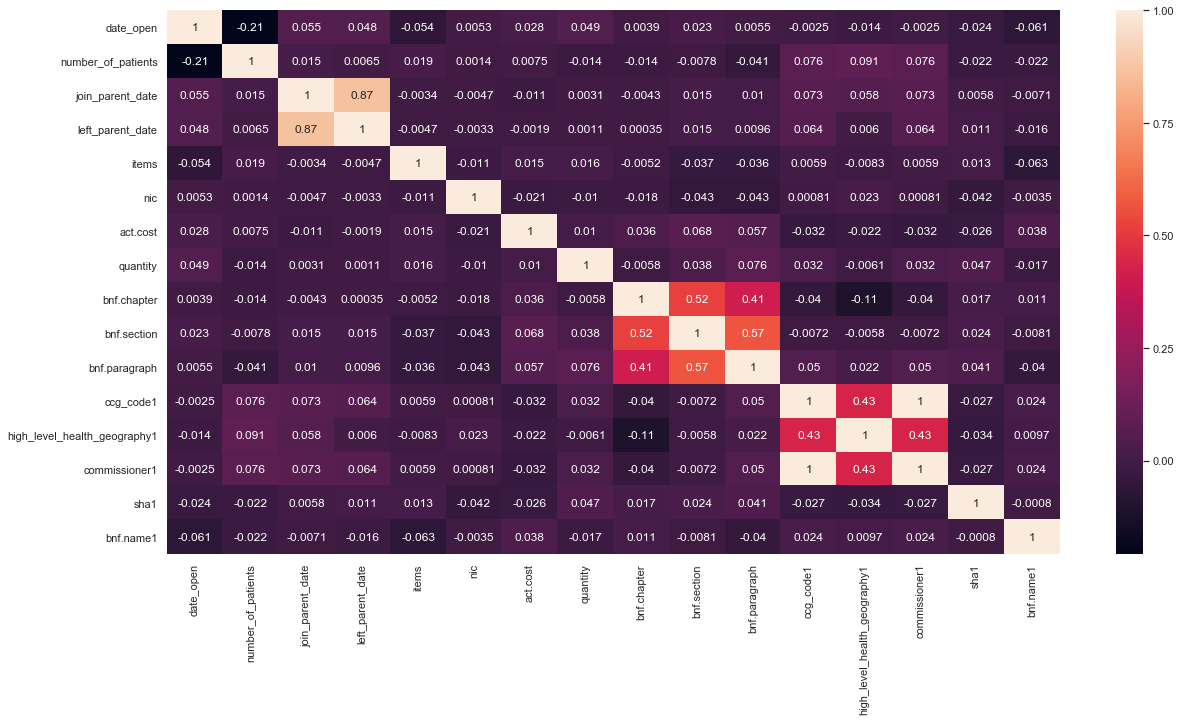

In [41]:
# Heatmap of the same thing
plt.figure(figsize=(20,10))
c = small.corr()
sns.heatmap(c,annot=True, )
c

# Histograms

SyntaxError: invalid character in identifier (<ipython-input-38-8c84fab229ac>, line 3)